## Program #2: Benchmarking Insertion and Selection Sorts
Catherine Mett, Noah Nieberle, Dominic Palermo


#### Introduction
In this assignment, we implemented the insertion and selection sorts discussed in class. We then ran some tests and benchmarked these algorithms to show correctness and the difference between their runtimes when given best, worst and average case scenarios. Graphs of these runtimes are shown in the analysis of the results. 

#### Algorithm Implementations
##### Insertion sort

In [57]:
def insertion_sort(arr):
    # if(len(arr)):
    #     return
    for i in range(1,len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:  
            arr[j+1] = arr[j]  
            j -= 1
        arr[j+1] = key 
        
arr = [12, 11, 13, 5, 6,324,36,-3,423]
insertion_sort(arr)
print(arr)


[-3, 5, 6, 11, 12, 13, 36, 324, 423]


##### Selection Sort

In [58]:
def selection_sort(arr):
    for j in range(0, len(arr)-1):
        smallest = j
        for i in range(j+1, len(arr)):
            if arr[i] < arr[smallest]:
                smallest = i
        temp = arr[j]
        arr[j] = arr[smallest]
        arr[smallest] = temp

#### Algorithm Tests

In [59]:
test1 = [12, 11, 13, 5, 6,324,36,-3,423]
test2 = [-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
test3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
insertion_sort(test1)
insertion_sort(test2)
insertion_sort(test3)
print("Insertion Sort:")
print(test1)
print(test2)
print(test3)

test1 = [12, 11, 13, 5, 6,324,36,-3,423]
test2 = [-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
test3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
selection_sort(test1)
selection_sort(test2)
selection_sort(test3)
print("\nSelection Sort:")
print(test1)
print(test2)
print(test3)

Insertion Sort:
[-3, 5, 6, 11, 12, 13, 36, 324, 423]
[-459, -301, -300, -232, -5, 0, 8, 21, 59, 60]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Selection Sort:
[-3, 5, 6, 11, 12, 13, 36, 324, 423]
[-459, -301, -300, -232, -5, 0, 8, 21, 59, 60]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Benchmarking

In [60]:
import time
from time import perf_counter
import random
import matplotlib.pyplot as plt
import statistics


def benchmark(sorting_algorithm, input_list):
    """
    Performs 3 tests on the sorting algorithm given an input list, where the input is shuffled, sorted, and reversed
    Return: Average of 5 benchmark times for each algorithm on an input list
    """
    shuffle_input_list = input_list.copy()
    #Shuffled list
    random.shuffle(shuffle_input_list)
    start_time = time.perf_counter()
    sorting_algorithm(shuffle_input_list)
    shuffled_benchmark_time = time.perf_counter() - start_time
    print("shuffled list")
    
    sort_input_list = input_list.copy()
    #Sorted List
    sort_input_list.sort()
    start_time = time.perf_counter()
    sorting_algorithm(sort_input_list)
    sorted_benchmark_time = time.perf_counter() - start_time
    print("sorted list")
    
    reverse_input_list = input_list.copy()
    #Reversed List
    reverse_input_list.reverse()
    start_time = time.perf_counter()
    sorting_algorithm(reverse_input_list)
    reversed_benchmark_time = time.perf_counter() - start_time
    print("reversed list")
    return (shuffled_benchmark_time, sorted_benchmark_time, reversed_benchmark_time)

def generate_input_list(n):
    return [random.randint(0,100) for _ in range(n)]


list_sizes = [10,50,250,1250,6250,31250]#,156250]

#Lists to hold the benchmark times for each algorithm
sorted_times_insertion = []
shuffled_times_insertion = []
reversed_times_insertion = []
sorted_times_selection = []
shuffled_times_selection = []
reversed_times_selection = []
trial_count = 3
for list_size in list_sizes:
    #Lists will hold the benchmark times for sorting of size n
    selection_shuffled_times = []
    selection_sorted_times = []
    selection_reversed_times = []
    insertion_shuffled_times = []
    insertion_sorted_times = []
    insertion_reversed_times = []
    for trial in range(trial_count):
        #Data is randomly generated
        data = generate_input_list(list_size)
        #Selection sort
        benchmark_times_ss = benchmark(selection_sort, data)

        shuffled_time_ss = benchmark_times_ss[0]
        sorted_time_ss = benchmark_times_ss[1]
        reversed_time_ss = benchmark_times_ss[2]

        selection_shuffled_times.append(shuffled_time_ss)
        selection_sorted_times.append(sorted_time_ss)
        selection_reversed_times.append(reversed_time_ss)

        #Insertion Sort
        benchmark_times_is = benchmark(insertion_sort, data)

        shuffled_time_is = benchmark_times_is[0]
        sorted_time_is = benchmark_times_is[1]
        reversed_time_is = benchmark_times_is[2]

        #Times for insertion sort with list size N
        insertion_shuffled_times.append(shuffled_time_is)
        insertion_sorted_times.append(sorted_time_is)
        insertion_reversed_times.append(reversed_time_is)
        print(trial)

    #The average time of selection sort algorithm for sorted, shuffled, and reversed input lists of size n
    selection_sorted_average_time = statistics.fmean(selection_sorted_times)
    selection_shuffled_average_time = statistics.fmean(selection_shuffled_times)
    selection_reversed_average_time = statistics.fmean(selection_reversed_times)

    #The average time of insertion sort algorithm for sorted, shuffled, and reversed input lists of size n
    insertion_sorted_average_time = statistics.fmean(insertion_sorted_times)
    insertion_shuffled_average_time = statistics.fmean(insertion_shuffled_times)
    insertion_reversed_average_time = statistics.fmean(insertion_reversed_times)

    sorted_times_selection.append(selection_sorted_average_time)
    shuffled_times_selection.append(selection_shuffled_average_time)
    reversed_times_selection.append(selection_reversed_average_time)

    sorted_times_insertion.append(insertion_sorted_average_time)
    shuffled_times_insertion.append(insertion_shuffled_average_time)
    reversed_times_insertion.append(insertion_reversed_average_time)
    print(list_size)

shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
10
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
50
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
250
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
1250
s

### Validating Formal Run Times

In [61]:
# import numpy as np
# from scipy.stats import linregress
# m, b = linregress(np.log())

#### Comparison of Algorithm Run Times

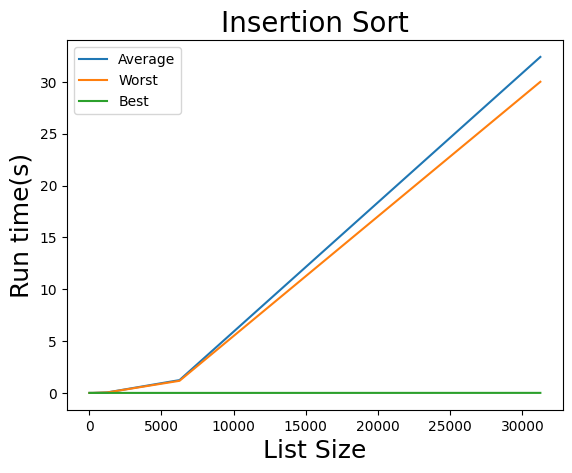

In [62]:
plt.plot(list_sizes, shuffled_times_insertion, label="Average")
plt.plot(list_sizes, reversed_times_insertion, label="Worst")
plt.plot(list_sizes, sorted_times_insertion, label="Best")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()

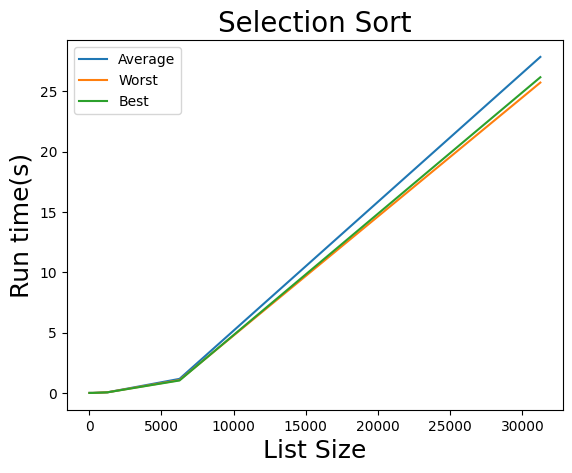

In [63]:
plt.plot(list_sizes, shuffled_times_selection, label="Average")
plt.plot(list_sizes, reversed_times_selection, label="Worst")
plt.plot(list_sizes, sorted_times_selection, label="Best")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()

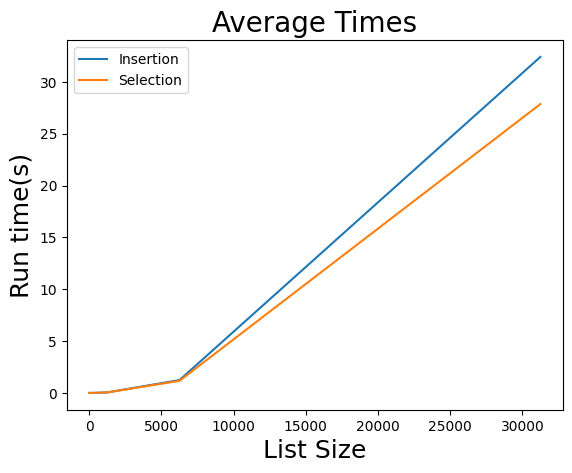

In [64]:
plt.plot(list_sizes, shuffled_times_insertion, label="Insertion")
plt.plot(list_sizes, shuffled_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Average Times", fontsize=20)
plt.legend()

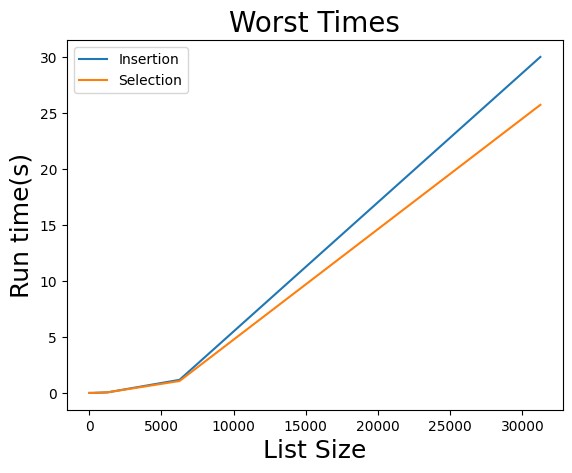

In [65]:
plt.plot(list_sizes, reversed_times_insertion, label="Insertion")
plt.plot(list_sizes, reversed_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Worst Times", fontsize=20)
plt.legend()

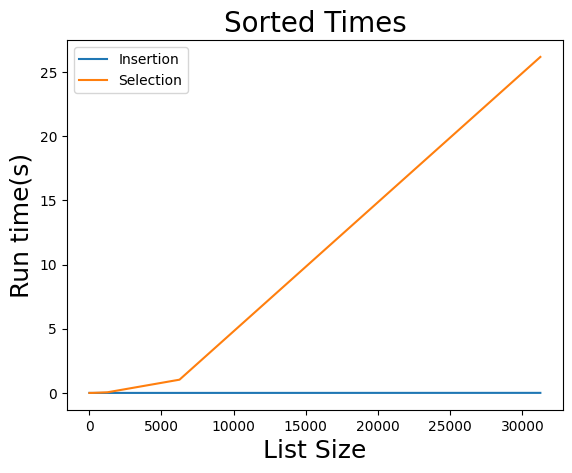

In [66]:
plt.plot(list_sizes, sorted_times_insertion, label="Insertion")
plt.plot(list_sizes, sorted_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Sorted Times", fontsize=20)
plt.legend()

#### Reflection Questions
1. 
|                            |        Theoretical Run Time        | Estimated Run Time |
|----------------------------|:----------------------------------:|:------------------:|
| insertionSort best case    | T(n) = 5n - 3                      |                    |
| insertionSort average case | T(n) = (3/4)n^2 + (19/4)n - 3      |                    |
| insertionSort worst case   | T(n) = 3n^2 + 2n - 3               |                    |
| selectionSort best case    | T(n) = (3/2)n^2 + (3/2)n + 3       |                    |
| selectionSort average case | T(n) = (1/7)n^2 + (1/7)n + (53/49) |                    |
| selectionSort worst case   | T(n) = 2n^2 + 2n + 1               |                    |

Do your estimates match the theory? 

2. Which algorithm had a better run time than the other and for which case(s)? Why do you think that one case was
substantially faster for that algorithm? (Hint: focus on the inner loops.)
    The worst and best case runtimes don't show much of a difference between the two sort algorithms, which is a surprise because the run-time for the best case with the insertion sort is O(n), whereas the runtime is O(n^2) for the selection sort no matter what. 
   For the average case, insertion sort seems to be the best algorithm for smaller lists, and selection sort seems to be better for longer lists. This would be because if the inner loop is run for the insertion sort, 2 lines of code are run. The inner loop is always run in selection sort, but there

3. Based on your results, which of the two sorting algorithms would you use in practice? Why?